## Project 2 Insurance Cost Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('insurance.csv')

#### Preparing and Inspecting Data

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
data.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

#### Converting Object Variables to Numerical

In [13]:
data['sex']=data['sex'].map({'female':0, 'male':1})
data['smoker']=data['smoker'].map({'yes':1, 'no':0})
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
                

In [14]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       1  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520

In [15]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Store Feature and Target

In [16]:
X = data.drop(['charges'],axis=1)

In [17]:
y = data['charges']

#### Test and Split

In [ ]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Selecting the Final Model after testing all models, Training the Model and Predict on Test Data

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [29]:
y_pred4 = gr.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'gr': y_pred4})

In [30]:
data1

Actual            gr
764    9095.06825  11001.128629
887    5272.17580   5840.174656
890   29330.98315  28001.980112
1293   9301.89355   9745.291602
259   33750.29180  33639.100981
...           ...           ...
109   47055.53210  45431.423211
575   12222.89830  12465.025294
535    6067.12675   6974.336525
543   63770.42801  47862.047791
846    9872.70100  10289.655388

[268 rows x 2 columns]

### Compare Performance Visually

In [31]:
import matplotlib.pyplot as plt

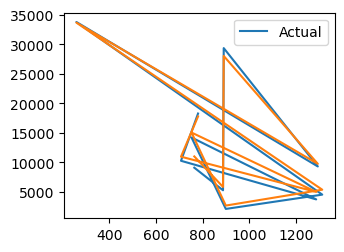

In [35]:
plt.subplot(221)
plt.plot(data1['Actual'].iloc[0:11],label='Actual')
plt.plot(data1['gr'].iloc[0:11])
plt.tight_layout()
plt.legend()

#### Evaluating the Alogrithm

In [36]:
from sklearn import metrics

In [38]:
score = metrics.r2_score(y_test,y_pred4)
print("R2 Score:",score)

R2 Score: 0.8779726251291786


In [39]:
mean_score = metrics.mean_absolute_error(y_test,y_pred4)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 2447.951558054584


#### Predict Changes for new Customer

In [40]:
data = {'age':35,
       'sex':1,
       'bmi':29.3,
       'children':1,
       'smoker':0,
       'region':2}

ndf = pd.DataFrame(data, index=[0])
ndf

age  sex   bmi  children  smoker  region
0   35    1  29.3         1       0       2

In [41]:
new_pred = gr.predict(ndf)
print("Present Insurance Value Offered : ",new_pred)

Present Insurance Value Offered :  [6218.74892665]


In [42]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

#### Save the Model Using Joblib

In [43]:
import joblib

In [45]:
joblib.dump(gr,'insurance_cost_prediction')

['insurance_cost_prediction']

In [46]:
model = joblib.load('insurance_cost_prediction')

In [47]:
model

GradientBoostingRegressor()

#### Conclusion

In [50]:
print("The GradientBoostingRegressor is the best Model to be Applied on the Data which give 87% Accuracy and predicts the Insurance cost for the customer most Accurately")

The GradientBoostingRegressor is the best Model to be Applied on the Data which give 87% Accuracy and predicts the Insurance cost for the customer most Accurately
